# Többváltozós analízis mérnöki alkalmazásai - 4. gyakorlat

## RGB varázslat

A következőben azt nézhetjük meg, hogy hogy lehet a kijelzőn színt keverni. Ehhez 4 csúszkát használunk, egy-egy a színcsatornákra és egy a ki-bekapcsolásra.

Érdemes használni az OpenCV megjelenítő ablakjának RGB érték kiíró tulajdonságát, elég az egeret a pont felé vinni és megadja annak RGB értéketit.

Amit még az ügyesebbek észrevehetnek, hogy a megjelenítésnél is vigyázni kell a csatornák sorrendjének cseréjével.

In [3]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    # mit jelent a 27? 
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

## 1. Feladat
Készítsünk hasonló megoldást, de csak szürke árnyalatosra.
Segítség: ugyanaz, mint az RGB megjelnítés, csak egy csatornába megy a 3 szín.

In [1]:
# megoldás
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('GRAY','image',0,255,nothing)


# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    # mit jelent a 27? 
    if k == 27:
        break

    # get current positions of four trackbars
    gray = cv2.getTrackbarPos('GRAY','image')

    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [gray,gray,gray]

cv2.destroyAllWindows()

# Színszűrés segítő

A következő kóddal a felső és alsó határokat könnyen meghatározhatjátok egy szín kiválasztásánál. Ez jól jön majd később, ha ilyen alkalmazást fejlesztetek - gyorsan meg tudjátok nézni, hogy egy kód mit is jelent.

In [5]:
# legszuperebb színkiválasztó.py

import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
#img = np.zeros((300,512,3), np.uint8)
image = cv2.imread(r"kepem.jpg") #kép
img = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
img_ = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
# cap = cv2.VideoCapture(0)

cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('H_low','image',0,255,nothing)
cv2.createTrackbar('S_low','image',0,255,nothing)
cv2.createTrackbar('V_low','image',0,255,nothing)
cv2.createTrackbar('H_high','image',0,255,nothing)
cv2.createTrackbar('S_high','image',0,255,nothing)
cv2.createTrackbar('V_high','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    # itt már 
    if k == 27:
        break

    # get current positions of four trackbars
    H_low = cv2.getTrackbarPos('H_low','image')
    S_low = cv2.getTrackbarPos('S_low','image')
    V_low = cv2.getTrackbarPos('V_low','image')
    H_high = cv2.getTrackbarPos('H_high','image')
    S_high = cv2.getTrackbarPos('S_high','image')
    V_high = cv2.getTrackbarPos('V_high','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = img_
    else:
        hsv = cv2.cvtColor(img_, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([H_low, S_low, V_low])
        upper_blue = np.array([H_high, S_high, V_high])
        #print(lower_blue)
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        res = cv2.bitwise_and(img_,img_, mask= mask)
        #cv.imshow('hsv',hsv)
        img[:] = res[:]

cv2.destroyAllWindows()

## 2. Feladat

Készítsétek el az előző példát, csak HSV-ben!

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('H','image',0,255,nothing)
cv2.createTrackbar('S','image',0,255,nothing)
cv2.createTrackbar('V','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    # mit jelent a 27? 
    if k == 27:
        break

    # get current positions of four trackbars
    h = cv2.getTrackbarPos('H','image')
    S = cv2.getTrackbarPos('S','image')
    v = cv2.getTrackbarPos('V','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [h,S,v]
        img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
# ctrl+x izgi dolog
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

# Videó a webkamerából

In [ ]:
import numpy as np
import cv2

# több kamera esetén a szám jelöli a kamerát - ha -1 van ott akkor az utolsó kamera lesz akitiválva
cap = cv2.VideoCapture(0)

# végtelen ciklus inítása a képek beolvasására
# fúj fúj végtelen ciklus
while(True):
    # a videocapture read függvényével megkaphatjuk a képet
    ret, frame = cap.read()
    
    # ha kiíratjuk háthatjuk, hogy a ret azt adja meg, hogy sikerült-e olvasni
    # print(ret)

    # Múlt órai átalakítás
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # az OpenCV beépített megjelenítőjét használhatjuk, ezzel a legkönnyebb megnézni.
    cv2.imshow('frame',gray)
    
    # várunk egy 'q'-ra a kilépéshez a ciklusból
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# A kamerát elengedi, nem fog a led mellette tovább világítani.
cap.release()
# Ha sok ablak lenne, ez a leghasznosabb parancs 
# Érdemes megpróbálni lekapcsolni kézzel az ablakokat még futás közben - elég nehéz
cv2.destroyAllWindows()

## Videó kimentése fájlba

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# VideoWriter objektum létrehozása - argumentumban a kódolás van
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# egy_tobbvaltozos_elete.avi legyen a neve
# 15 fps felett "úgyse" lát az ember, úgyhogy jó lesz a 20 (kivéve a gamerek, ők 69^420 fpst látnak, ezért kell nekik drága monitor)
# a 4k és 8k közt nincs akkora különbség, úgyhogy a 480p és a 1080p közt se lehet akkora.
out = cv2.VideoWriter('egy_tobbvaltozos_elete.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        # nem semmi, megfordul a kép
        # ha nagyon viccesek vagyunk akkor csak minden második képet fordítunk meg
        frame = cv2.flip(frame,0)
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # ha nem jön vissza  kép akkor is kilép
    else:
        break

# ha ez nincs akkor hibásan is mentheti a videót
cap.release()
out.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:626: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


## A konvolúció

Akinek régen volt az általános, átnézzük azért, hogy mit is jelent, és megnézzük az általános alakot is. A konvolúció (diszkrét és folytonos is) egy olyan művelet, amely $f$ és $g$ függvények egymásra hatását fejezi ki: megmutatja, hogy az egyik függvényt a másikon "végigtolva" milyen időfüggvényt kapok. A konvolvált $h$ függvényt a következő "konvolúciós integrál" adja:
$$h(t)=\int_{-\infty}^{\infty}f(\tau)*g(t-\tau)d\tau$$
Mi is történik ebben a kifejezésben? Azt jelenti, hogy $h(t)$ időfüggvény egy $t$ időpillanatbeli értékének kiszámításához $g$ t körüli részeinek értékeit mind megszorozzuk $f$ megfelelő értékeivel. Szemléltető ábra:

![kep1](http://ertedmar.hu/assets/content/konvolucio/konvolucio_animation2.gif)

Általában mind $f$, mind $g$ csak egy szűk intervallumon nem nulla - ezért nem kell folyton improprius integrálokkal varázsolni. Diszkrét időben még egyszerűbb ez az elképzelés.

![kep2](https://i.stack.imgur.com/0RTyh.png)

De mihez is lehet ennek köze? Nézzük meg alaposan a 2. órán írt kódot - találunk egy diszkrét konvolúciót! Ez a mozgó átlag. (egy $n$ elemből álló, $1/n$ értékekkel feltöltött vektor konvolúciós integrálja bármely $a$ vektorral $a$ mozgó átlaga $n$ elemenként számítva.

Mivel ezt a mozgó átlagot két, 1D-s vektort összeműveletelve kaptuk, érezzük, hogy akár ki is terjeszthetjük $n$ dimenzióra a konvolúciót - de most maradjuk csak meg 2D-ben. Mit jelentene ez 2D-ben? Legyenek $A$ és $K$ kvadratikus mátrixok (jóval több sorral/oszloppal rendelkezik, mint $K$) számoljuk ki $A$ minden eleménél a $K$ transzponáltjával vett "súlyozott mozgó átlagot" és kész is vagyunk! [Itt](http://www.songho.ca/dsp/convolution/convolution2d_example.html) végig van csinálva egy példa két 3x3-as mátrixra, ebből biztosan érthető.

## 1 D konvolúció

Kicsit siettünk a második órán, de talán emlékeztek, hogy volt szó jelek simításáról és a mozgó átlagról. Erre teljesen jó egy konvolúció is!

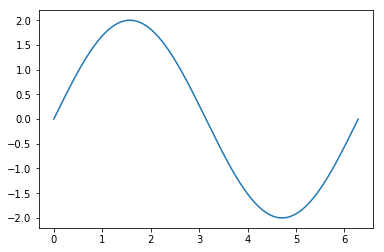

In [41]:
import matplotlib.pyplot as plt
# legyen egy zajos sin fg
num_of_pts=10000

time=np.linspace(0,2*np.pi, num_of_pts)
sign=np.sin(time)+1*np.sin(1*time) #a kód így nem egészen jó. módosítsátok úgy, hogy valóban "szőrös" legyen a jel!

%matplotlib inline
plt.plot(time, sign)


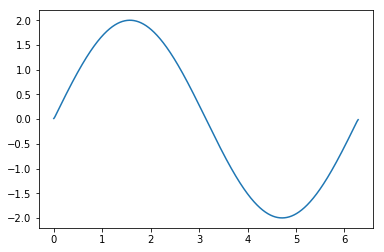

In [42]:
kernel=np.ones(80)
kernel/=80 #próbáljátok ki, hogy a kernel méretének változtatása hogy hat!

moving_avg = np.convolve(sign, kernel, mode='same')
%matplotlib inline
plt.plot(time,moving_avg)

## 2D konvolúció és képelemzés 

Dolgozzunk az egyszerűség kedvéért fekete-fehér képekkel. Láthattuk, hogy ezeket mátrixokban tároltuk. Mossuk el a képünket, definiáljunk egy olyan mátrixot, amit egy konvolúció kerneljeként használva egy "átlagolt" képet kapunk vissza!

In [43]:
import numpy as np
import cv2


#most kerítsünk elő egy képet
img=cv2.imread('kepem.jpg', 0)
cv2.imshow('Szürkeárnyalatos', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#mossuk el!
from scipy import signal

#kernel def
kernel=np.ones((10,10))
kernel=kernel/100
print(kernel)

blur = signal.convolve2d(np.asarray(img), kernel, boundary='symm', mode='same')
#blur = blur.astype('uint8') - mit rontok el?

cv2.imshow('Szürkeárnyalatos - elmosva', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


In [38]:
#A profik nem írják meg ezeket:
blur_cv2blur=cv2.blur(img,(10,10)) #a kernel mérete!

cv2.imshow('Szürkeárnyalatos - elmosva_2', blur_cv2blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
#Gauss - ugyanaz, csak nem konstans az array értéke ->kicsit szebb szélek
blur_cv2gauss=cv2.GaussianBlur(img,(11,11),0) #a kernel mérete - módosítani kell, pltan kegyen!

cv2.imshow('Szürkeárnyalatos - elmosva_3', blur_cv2gauss)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Konvolúció és élkeresés

Nem csak az elmosásra jó: ha a kernel megfelelő, kiválaszthatjuk azokat a területeket vele, ahol nagy az eltérés a szomszédos értékek között $\longrightarrow$ élkeresés!

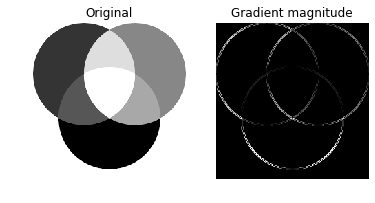

In [44]:

%matplotlib inline
from scipy import signal
from scipy import misc



image = cv2.imread("rgb_venn.png",0)
kernel = np.array([[ 10, 0, -10],
                   [ 0, 0, 0],
                   [ -10, 0, 10]]) 


grad = signal.convolve2d(np.asarray(image), kernel, boundary='symm', mode='same')#boundary: milyen padding, mode: kimenet mérete
grad = np.absolute(grad)
#innentől ez csak a plot
#módosítsatok úgy, hogy csak a víszintes, majd úgy is, hogy csak a függőleges éleket emeljem ki!
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(1, 2)
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_mag.imshow(grad, cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
'''ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()'''

fig.show()